<a href="https://colab.research.google.com/github/zohaib-zohi/Number-Guessing/blob/main/Data_Handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Required libraries

In [4]:
# ---------------------------
# Imports libraries
# -----------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Loading the Dataset

In [18]:
# # Option A - Use seaborn's built-in Titanic dataset (easy for learning)
df = sns.load_dataset('titanic')

# Preview the data
print("Dataset shape:", df.shape)
display(df.head())


Dataset shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


For my Drive Dataset lies inside mydrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Handling Assigment/titanic_dataset.csv')
df.head()


Understandig the Dataset like basic info


In [6]:
# Data info: types and non-null counts
print("Info:")
df.info()

# Summary statistics for numeric columns
print("\nSummary statistics (numerical):")
display(df.describe())

# Check missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())

# Check duplicate rows
print("\nDuplicate rows count:", df.duplicated().sum())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

Summary statistics (numerical):


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Missing values per column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Duplicate rows count: 107


Now let clean the data(Data Cleaning)

In [7]:
# Make a copy to keep original safe
df_clean = df.copy()

# 1) Drop 'deck' column due to many missing values (optional)
if 'deck' in df_clean.columns:
    df_clean = df_clean.drop(columns=['deck'])

# 2) Fill Age missing values with median
if df_clean['age'].isnull().sum() > 0:
    age_median = df_clean['age'].median()
    df_clean['age'] = df_clean['age'].fillna(age_median)

# 3) Fill embarked with mode (most common value)
if 'embarked' in df_clean.columns and df_clean['embarked'].isnull().sum() > 0:
    embarked_mode = df_clean['embarked'].mode()[0]
    df_clean['embarked'] = df_clean['embarked'].fillna(embarked_mode)

# 4) (Simple approach) Drop any remaining rows with missing values
print("\nMissing values before final drop:", df_clean.isnull().sum().sum())
df_clean = df_clean.dropna()
print("Shape after dropping rows with any missing values:", df_clean.shape)

# 5) Remove duplicates if any
duplicates = df_clean.duplicated().sum()
print("Duplicates found and removed:", duplicates)
if duplicates > 0:
    df_clean = df_clean.drop_duplicates()



Missing values before final drop: 2
Shape after dropping rows with any missing values: (889, 14)
Duplicates found and removed: 116


Basic Analysis

In [8]:
# Descriptive stats (after cleaning)
display(df_clean.describe(include='all'))

# Mean and median of Age and Fare
print("\nMean age:", df_clean['age'].mean())
print("Median age:", df_clean['age'].median())
print("Mean fare:", df_clean['fare'].mean())
print("Median fare:", df_clean['fare'].median())

# Mode of categorical columns (common values)
for col in ['class','sex','embarked']:
    if col in df_clean.columns:
        print(f"Mode of {col}:", df_clean[col].mode()[0])

# Correlation matrix for numerical columns
num_cols = df_clean.select_dtypes(include=[np.number]).columns
corr = df_clean[num_cols].corr()
print("\nCorrelation matrix:\n", corr)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
count,773.000000,773.000000,773,773.000000,773.000000,773.000000,773.000000,773,773,773,773,773,773,773
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,Southampton,no,True
freq,NaN,NaN,483,NaN,NaN,NaN,NaN,560,401,443,443,560,455,435
mean,0.411384,2.249677,NaN,29.528357,0.530401,0.421734,34.761659,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.492403,0.852315,NaN,13.731264,0.991241,0.841380,52.425906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,1.000000,NaN,21.000000,0.000000,0.000000,8.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,15.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,36.000000,1.000000,1.000000,33.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Mean age: 29.52835705045278
Median age: 28.0
Mean fare: 34.76165886157826
Median fare: 15.9
Mode of class: Third
Mode of sex: male
Mode of embarked: S

Correlation matrix:
           survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.328391 -0.083165 -0.036272  0.071563  0.245187
pclass   -0.328391  1.000000 -0.339372  0.085297  0.037220 -0.553452
age      -0.083165 -0.339372  1.000000 -0.278435 -0.181529  0.089624
sibsp    -0.036272  0.085297 -0.278435  1.000000  0.379105  0.135178
parch     0.071563  0.037220 -0.181529  0.379105  1.000000  0.192186
fare      0.245187 -0.553452  0.089624  0.135178  0.192186  1.000000


Catagorical counts

In [9]:
# Frequency counts for key categorical columns
if 'sex' in df_clean.columns:
    print("Value counts for sex:")
    print(df_clean['sex'].value_counts())
if 'class' in df_clean.columns:
    print("\nValue counts for class:")
    print(df_clean['class'].value_counts())
if 'embarked' in df_clean.columns:
    print("\nValue counts for embarked:")
    print(df_clean['embarked'].value_counts())


Value counts for sex:
sex
male      483
female    290
Name: count, dtype: int64

Value counts for class:
class
Third     401
First     208
Second    164
Name: count, dtype: int64

Value counts for embarked:
embarked
S    560
C    155
Q     58
Name: count, dtype: int64


In [ ]:
Servival analysis by age group

Survival rate by age group:


/tmp/ipython-input-1058203925.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = df_clean.groupby('age_group')['survived'].mean().reset_index()


,age_group,survival_rate
0,Children (0-12),0.573529
1,Teenagers (13-18),0.447761
2,Adults (19-60),0.396440
3,Seniors (61+),0.200000


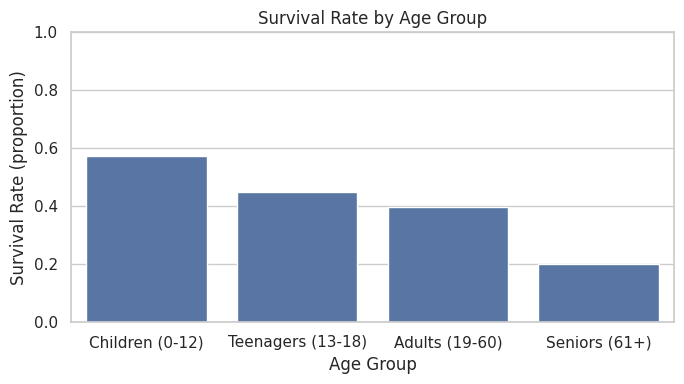

In [14]:
# Create age bins and labels
bins = [0, 12, 18, 60, 120]
labels = ['Children (0-12)', 'Teenagers (13-18)', 'Adults (19-60)', 'Seniors (61+)']
df_clean['age_group'] = pd.cut(df_clean['age'], bins=bins, labels=labels, right=True)

# Calculate survival rate per age group (survived column is 0 or 1)
survival_by_age = df_clean.groupby('age_group')['survived'].mean().reset_index()
survival_by_age.columns = ['age_group', 'survival_rate']
print("Survival rate by age group:")
display(survival_by_age)

# Plot survival rates
plt.figure(figsize=(7,4))
sns.barplot(x='age_group', y='survival_rate', data=survival_by_age)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate (proportion)')
plt.xlabel('Age Group')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


Visualization(Final Visualization)

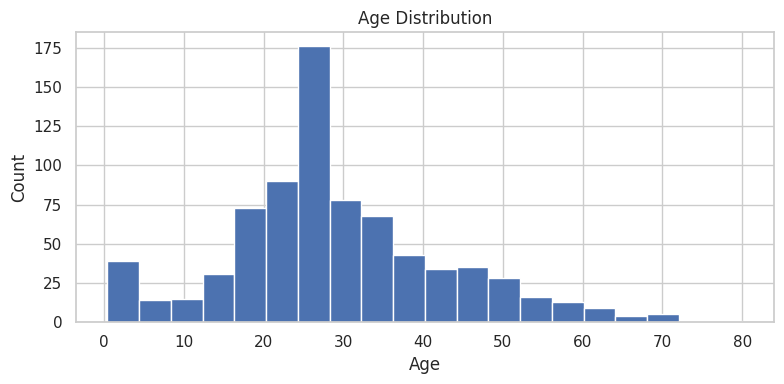

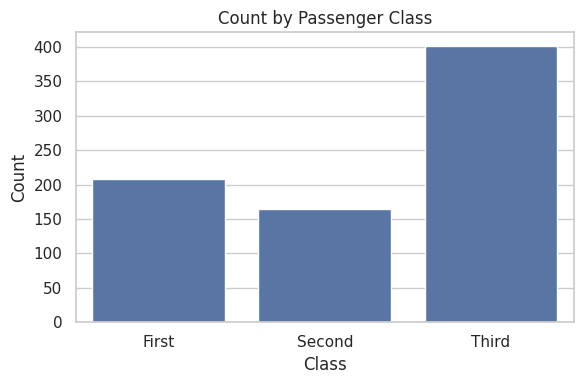

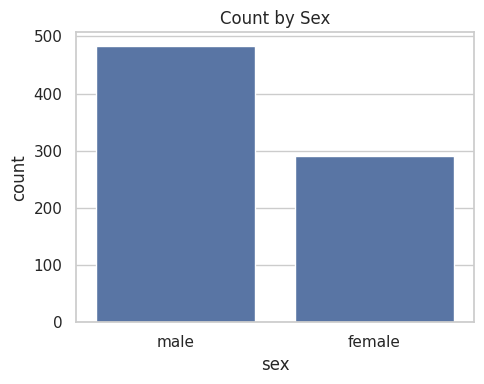

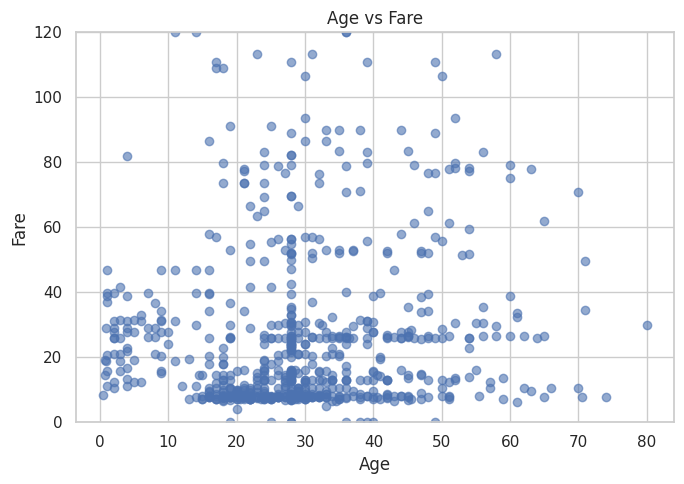

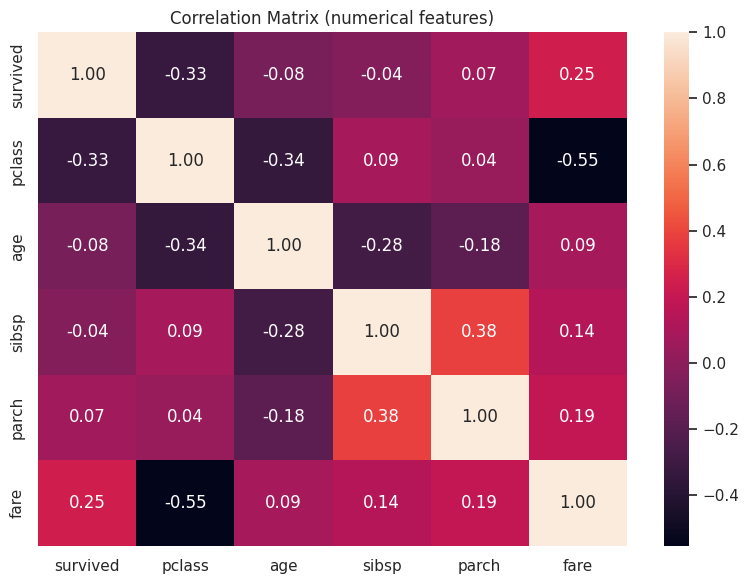

In [10]:
# 1) Histogram of Age
plt.figure(figsize=(8,4))
plt.hist(df_clean['age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2) Bar plot for class
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df_clean)
plt.title('Count by Passenger Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 3) Count plot for sex
plt.figure(figsize=(5,4))
sns.countplot(x='sex', data=df_clean)
plt.title('Count by Sex')
plt.tight_layout()
plt.show()

# 4) Scatter plot Age vs Fare (limit y to 95th percentile for clarity)
plt.figure(figsize=(7,5))
plt.scatter(df_clean['age'], df_clean['fare'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.ylim(0, df_clean['fare'].quantile(0.95))
plt.tight_layout()
plt.show()

# 5) Heatmap of correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Correlation Matrix (numerical features)')
plt.tight_layout()
plt.show()


Short Summary of the above code

In [13]:
print('--- Short Report Summary ---')
print('Dataset used: Titanic (seaborn)')
print('\nKey insights:')
print('- Age and Fare are numerical. Age was imputed with median.')
print('- Class and Sex are important categorical features; these often correlate with survival.')
print('- Survival differs by age group (see optional extension chart).')

print('\nChallenges faced:')
print('- Missing values (e.g., deck, age) required simple imputation or dropping.')
print('- Outliers in Fare may affect visualizations and models.')

print('\nHow this helps in computer vision:')
print('- EDA and cleaning skills transfer to image metadata and labels.')
print('- Handling missing labels and class imbalance is important for classification tasks.')


--- Short Report Summary ---
Dataset used: Titanic (seaborn)

Key insights:
- Age and Fare are numerical. Age was imputed with median.
- Class and Sex are important categorical features; these often correlate with survival.
- Survival differs by age group (see optional extension chart).

Challenges faced:
- Missing values (e.g., deck, age) required simple imputation or dropping.
- Outliers in Fare may affect visualizations and models.

How this helps in computer vision:
- EDA and cleaning skills transfer to image metadata and labels.
- Handling missing labels and class imbalance is important for classification tasks.


**Report of Data Handling Assignment**

* Dataset Used

I used my own dataset stored in Google Drive for this assignment. The dataset contains structured information that I loaded into a pandas DataFrame to perform analysis and visualization.

* Key Insights & Observations

During the analysis, I explored the structure of the data, checked for missing values, and examined statistical summaries. I observed patterns and relationships between different columns, and used visualizations to better understand the distribution and behavior of the data.

* Challenges Faced

While working on this assignment, I faced challenges such as:

Handling missing values properly

Removing duplicate entries

Converting incorrect data types

Understanding data distribution before visualization

These steps helped me learn how important data cleaning and preparation are before performing any analysis.

* Importance for Computer Vision

This assignment helped me understand essential data handling techniques such as:

Loading and preparing data

Cleaning and preprocessing

Visualizing patterns

Extracting useful information

In computer vision, similar steps are used when handling image datasets. Before training models, we must:

Load image data

Preprocess and normalize images

Handle missing or corrupted files

Visualize datasets to understand patterns.


> **So this assignment builds the foundation needed to handle image datasets and prepare them for machine learning and deep learning tasks in computer vision.**

